In [1]:
import numpy as np
import pandas as pd

# Covid

Let us explore a few concepts in probability in the context of covid recovery data. 

In [2]:
df_covid = pd.read_csv("covid.csv")

In [3]:
df_covid.head()

recovery_time
0           13.0
1            8.0
2           53.0
3           43.0
4           76.0

In [4]:
df_covid["recovery_time"].unique()

array([13.,  8., 53., 43., 76., 92., 59., 42., 18.,  2., nan, 99., 60.,
       75., 64.,  1., 50., 72., 46., 98., 96., 90.,  4.,  3., 12., 24.,
       14., 21.,  7., 37., 33., 10., 11., 17., 56., 25., 41., 48.,  6.,
        9.,  5., 91., 67., 16., 84., 57., 34., 30., 40., 52., 94., 22.,
       81.])

The 'nan' indicates that some people did not recover and died.

## Sample space and events

We use the term **Sample Space** to denote the set of all **outcomes**.

How do we decide how to define outcomes for the above dataset?

### One example of defining outcomes and sample space

One doctor may only be interested in who survived. For such a requirement, we can think of defining outcome that simply states whether the person "survived" or "died". Let us write a small snippet of code to implement that.

In [14]:
def two_types(val):
    if np.isnan(val):
        return "died"
    else:
        return "survived"
df_covid["outcome"] = df_covid["recovery_time"].apply(two_types)

What the previous cell does is the it adds a column called "outcome", whose values will be "survived" or "died"

In [15]:
df_covid.head()

recovery_time   outcome
0           13.0  survived
1            8.0  survived
2           53.0  survived
3           43.0  survived
4           76.0  survived

So now, our sample space is <br>
$S = \{\text{"recoverd"}, \text{"died"}\}$

Let us next look at the `value_counts` of this outcome

In [7]:
df_covid["outcome"].value_counts()

survived    95
died         5
Name: outcome, dtype: int64

We see that 95 out of 100 people survived.

We can see this visually using `hist` for histogram

<AxesSubplot:>

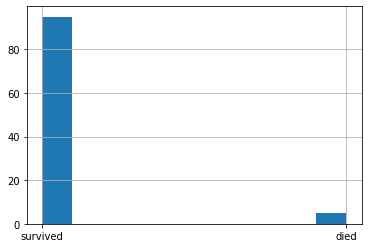

In [8]:
df_covid["outcome"].hist()

### Another example of defining outcomes and sample space

Another doctor may be more interested in some details, and thus defines outcomes as follows:<br>
$r_1$: Set of all people who recovered within 1 to 7 days<br>
$r_2$: Set of all people who recovered within 8 to 14 days<br>
$r_3$: Set of all people who recovered in more than 15 days<br>
$d$: Set of people who unfortunately could not recover<br>

The following snippet of code helps us achieve this

In [17]:
def four_types(val):
    if val <= 7:
        return "r1"
    elif val <= 14:
        return "r2"
    elif not np.isnan(val):
        return "r3"
    else:
        return "d"
df_covid["outcome"] = df_covid["recovery_time"].apply(four_types)

In [10]:
df_covid.head(10)

recovery_time outcome
0           13.0      r2
1            8.0      r2
2           53.0      r3
3           43.0      r3
4           76.0      r3
5           92.0      r3
6           59.0      r3
7           42.0      r3
8           18.0      r3
9            2.0      r1

Now, our sample space is given by<br>
$S = \{r_1, r_2, r_3, d\}$

As before, we call `hist` to visualize

<AxesSubplot:>

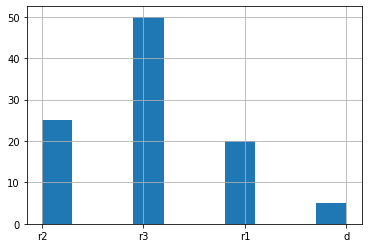

In [21]:
df_covid["outcome"].hist()

### What are events?

An event is a  *subset* of the sample space

Let us consider the covid example with $\{r_1, r_2, r_3, d\}$ as sample space

In [22]:
df_covid.head(20)

recovery_time outcome
0            13.0      r2
1             8.0      r2
2            53.0      r3
3            43.0      r3
4            76.0      r3
5            92.0      r3
6            59.0      r3
7            42.0      r3
8            18.0      r3
9             2.0      r1
10            NaN       d
11           13.0      r2
12           13.0      r2
13           99.0      r3
14           60.0      r3
15           18.0      r3
16           75.0      r3
17           64.0      r3
18            1.0      r1
19            1.0      r1

Some examples of events are:
1) Patients who recovered: $E_1 = \{r_1, r_2, r_3\}$<br>
2) Patients who recovered in 14 days: $E_2 = \{r_1, r_2\}$<br>
3) Patients who died: $E_3 = \{d\}$<br>


The **empty set** is given by $\phi = \{\}$. Even this is an event. 

The whole sample space $S = \{r_1, r_2, r_3, d\}$ is also an event.

### What are mutually exclusive events?

Two events $A$ and $B$ are said to be **mutually exclusive** if their intersection is empty

$A \cap B = \{\}$

$P[A \cap B] = 0$

#### Example 1 - Covid recovered and died

Let event $A$ be "recovered" and event $B$ be "died". Clearly, there is no one who belongs in both the events.<br>
$A = \{r_1, r_2, r_3\}$. <br>
$B = \{d\}$<br>
We denote this using the intersection notation
\begin{align}
A \cap B = \{\}
\end{align}

The probability of the intersection is zero:
\begin{align}
P[A \cap B] = 0
\end{align}

We say that $A$ and $B$ are mutually exclusive

#### Example 2 - Recovered in 1 to 7 days Vs recovered in 8 to 14 days

Let event $C$ be "recovered in 1 to 7 days" and event $D$ be "recovered in 8 to 14 days". Clearly, there is no one who belongs in both the events.<br>
$C = \{r_1\}$. <br>
$D = \{r_2\}$<br>
We denote this using the intersection notation
\begin{align}
C \cap D = \{\}
\end{align}

The probability of the intersection is zero:
\begin{align}
P[C \cap D] = 0
\end{align}

We say that $C$ and $D$ are mutually exclusive